# Addendum Homework 4

Computation time for factoring matrices is expected to have polynomial behavior. Thus, instead of fitting the best exponential function $C_2 \cdot n^{C_1}$, I will fit a polynomial of the third order. Besides, due to the similar complexity of forward and backward substitution, now I will just consider the time employed factoring the matrix in exercise 6.2.

## Ex 6.2: Better plots


p1 =

    0.0000   -0.0000   -0.0000    0.0012


p2 =

   1.0e-03 *

   -0.0000    0.0000   -0.0043    0.3831




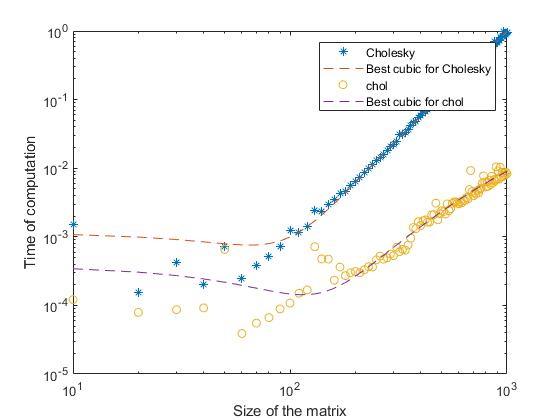

In [3]:
times = zeros(2,length(1:100));

for i = 1:100
    n = i*10;
    A = PdSMat(n);
    
    tic
    B = Cholesky(A);
    times(1,i) = toc;
    
    tic
    B = chol(A);
    times(2,i) = toc;
end
x = 10:10:1000;
p1 = polyfit(x,times(1,:),3)
p2 = polyfit(x,times(2,:),3)

figure
loglog(x,times(1,:),'*')
hold on
loglog(x,p1(1).*x.^3 + p1(2).*x.^2 + p1(3).*x + p1(4),'--')
loglog(x,times(2,:),'o')
loglog(x,p2(1).*x.^3 + p2(2).*x.^2 + p2(3).*x + p2(4),'--')
hold off
xlabel('Size of the matrix')
ylabel('Time of computation')
legend('Cholesky','Best cubic for Cholesky','chol','Best cubic for chol')

In [8]:
p1(4)


ans =

    0.0012





p1 =

    0.0000   -0.0000    0.0011   -0.0652


p2 =

    0.0000   -0.0000    0.0001   -0.0032

> In xlabel (line 56)



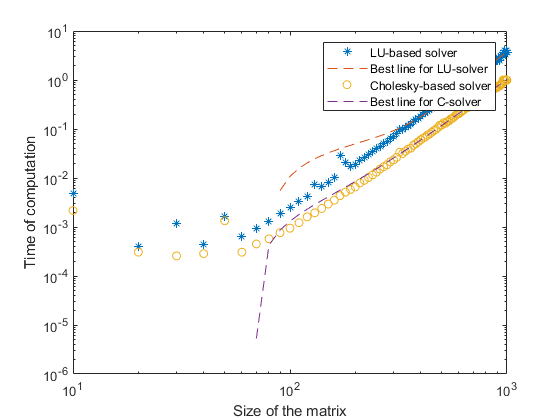

In [11]:
times = zeros(2,length(1:50));

for i = 1:100
    n = i*10;
    A = PdSMat(n);
    b = ones(n,1);
    
    tic;
    [L U] = LUFacto(A);
    x1 = BackSub(U,ForwSub(L,b));
    times(1,i) = toc;
    
    tic;
    B = Cholesky(A);
    x2 = BackSub(B',ForwSub(B,b));
    times(2,i) = toc;
end

x = 10:10:1000;
p1 = polyfit(x,times(1,:),3)
p2 = polyfit(x,times(2,:),3)

figure
loglog(x,times(1,:),'*')
hold on
loglog(x,p1(1).*x.^3 + p1(2).*x.^2 + p1(3).*x + p1(4),'--')
loglog(x,times(2,:),'o')
loglog(x,p2(1).*x.^3 + p2(2).*x.^2 + p2(3).*x + p2(4),'--')
hold off
xlabel('Size of the matrix')
ylabel('Time of computation')
legend('LU-based solver','Best line for LU-solver','Cholesky-based solver','Best line for C-solver')

## Ex 6.9

Recall that $$N_\mathrm{op}(n,p) =  p(p-1)(n-p) + \dfrac{1}{3}p(p-1)(p-2) = np^2 - p^3 + \dfrac{1}{3}p^3 + O(np + p^2).$$ As we assumed $n>>p$, we have $p^2 \leq np$. We conclude that $N_\mathrm{op}(n,p) = np^2 - \dfrac{2}{3}p^3 + O(np)$.